## Basit Doğrusal Regresyon

In [1]:
import pandas as pd
ad = pd.read_csv("Advertising.csv" , usecols = [1,2,3,4])
import matplotlib as plt
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [4]:
df.isnull().values.any()

False

In [5]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


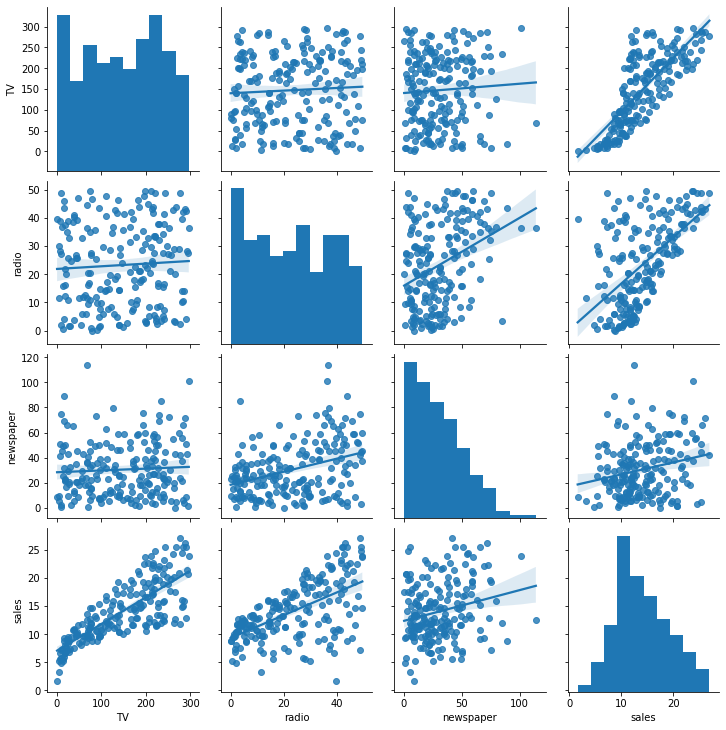

In [6]:
import seaborn as sns
sns.pairplot(df , kind = "reg");

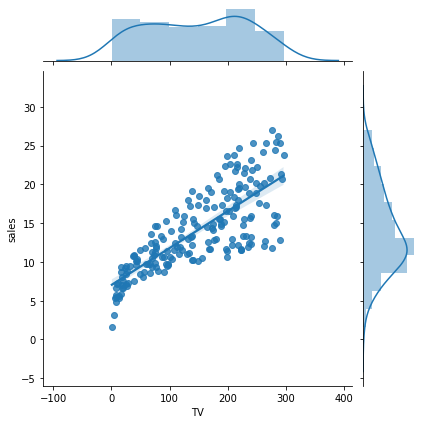

In [7]:
sns.jointplot(x = "TV", y ="sales", data = df, kind ="reg") 

### StatsModels ile modelleme

In [8]:
import statsmodels.api as sm
import seaborn as sns

In [9]:
X = df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [10]:
X = sm.add_constant(X)
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [11]:
y = df["sales"]
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [12]:
lm = sm.OLS(y,X)

In [13]:
model = lm.fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           1.47e-42
Time:                        02:59:56   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
import statsmodels.formula.api as smf
lm = smf.ols("sales~TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           1.47e-42
Time:                        02:59:56   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [17]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [18]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [19]:
model.f_pvalue

1.4673897001947095e-42

In [20]:
model.mse_model

3314.6181668686486

In [21]:
model.rsquared_adj

0.6099148238341623

In [22]:
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [23]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [24]:
print("Sales:" + str("%.2f" % model.params[0]) + "+TV*" + str("%.2f" % model.params[1]))

Sales:7.03+TV*0.05


AttributeError: module 'matplotlib' has no attribute 'xlim'

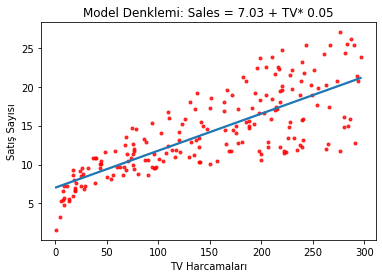

In [25]:
g = sns.regplot(df["TV"], df["sales"], ci = None, scatter_kws={'color':'r','s':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV* 0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom = 0)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
X = df[["TV"]]
y = df[["sales"]]
reg = LinearRegression()
model = reg.fit(X,y)
model.intercept_
model.coef_

array([[0.04753664]])

In [46]:
model.score(X,y)

0.611875050850071

In [ ]:
model.predict(X)[0:10]

## Liner Regresyon Tahmin

In [ ]:
model.predict([[30]])

In [ ]:
yeni_veri = [[5], [90], [200]]

In [ ]:
model.predict(yeni_veri)

## Çoklu regresyon

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [29]:
X = df.drop("sales", axis = 1)
y = df["sales"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [31]:
X_train.shape

(160, 3)

In [32]:
y_train.shape

(160,)

In [33]:
X_test.shape

(40, 3)

In [34]:
training = df.copy()

In [36]:
training.shape

(200, 4)

## StatsModels

In [37]:
lm = sm.OLS(y_train, X_train)

model = lm.fit()
model.summary()

In [41]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0531,0.001,36.467,0.000,0.050,0.056
radio,0.2188,0.011,20.138,0.000,0.197,0.240
newspaper,0.0239,0.008,3.011,0.003,0.008,0.040


## Scitlearn Model

In [47]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [48]:
model.intercept_

2.979067338122629

In [49]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

## Tahmin

In [52]:
yeni_veri = [[30], [10],[40]]
yeni_veri = pd.DataFrame(yeni_veri).T

In [53]:
model.predict(yeni_veri)

array([6.32334798])

In [57]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [58]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [59]:
rmse

1.644727765644337

In [61]:
rmse1 = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

In [62]:
rmse1

1.7815996615334502

## Model Tuning / Model Doğrulama

In [65]:
cross_val_score(model, X_train, y_train, cv = 10, scoring ="r2").mean()

0.791354859691634

In [68]:
np.sqrt(-cross_val_score(model,
                X_train,
                y_train,
                cv = 10,
                scoring ="neg_mean_squared_error")).mean()

1.6513523730313335

In [69]:
np.sqrt(-cross_val_score(model,
                X_test,
                y_test,
                cv = 10,
                scoring ="neg_mean_squared_error")).mean()

1.8462778823997095